In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv(r"C:\Users\rianl\OneDrive\Desktop\Akhil\Data Science and ML\Census Income\census-income.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [4]:
df.columns = df.columns.str.replace("-",".")

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'annual_income'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace("_",".")
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'annual.income'],
      dtype='object')

In [7]:
df = df.replace('?', 'NaN')

In [8]:
df.head(18
       )

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,annual.income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [9]:
df = df.replace('NaN', np.nan)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,annual.income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
annual.income        0
dtype: int64

In [11]:
df.dropna()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,annual.income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
df = df.rename(columns = {'fnlwgt':'Final weight'})
df

,age,workclass,Final weight,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,annual.income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 4. Logistic Regression:

# A) Simple Logistic Regression

In [13]:
col_list=list(df.columns)

In [14]:
col_list

['age',
 'workclass',
 'Final weight',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'annual.income']

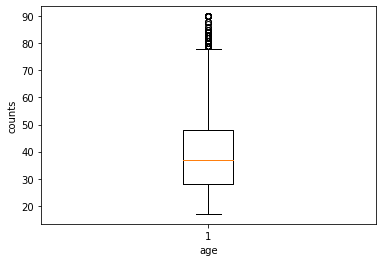

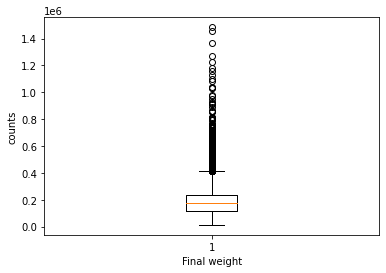

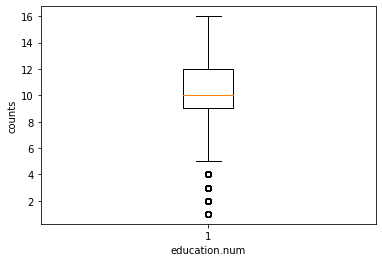

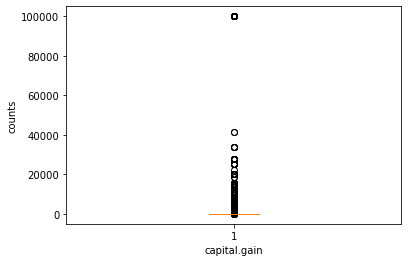

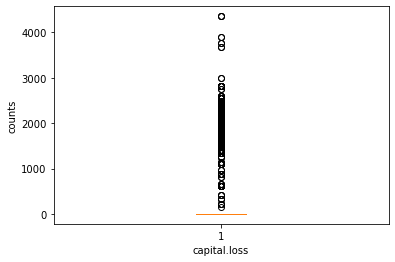

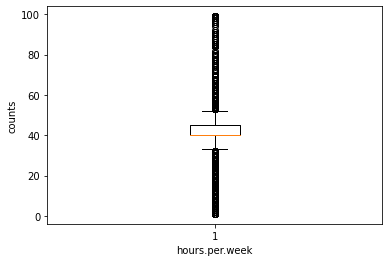

In [15]:
for i in col_list:
    if df[i].dtype==object:
        pass
    else:
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('counts')
        plt.show()

In [16]:
#Removing the outliers by defining q1,q3 and IQR
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
print(IQR)

age                   20.0
Final weight      119224.0
education.num          3.0
capital.gain           0.0
capital.loss           0.0
hours.per.week         5.0
dtype: float64


In [17]:
df=df[~((df<(q1-1.5*IQR)) | (df>q3+1.5*IQR)).any(axis=1)]

C:\Users\PRAKASH\AppData\Local\Temp/ipykernel_1932/2283517156.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(q1-1.5*IQR)) | (df>q3+1.5*IQR)).any(axis=1)]


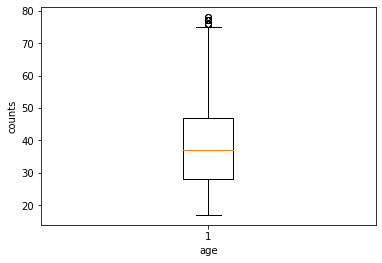

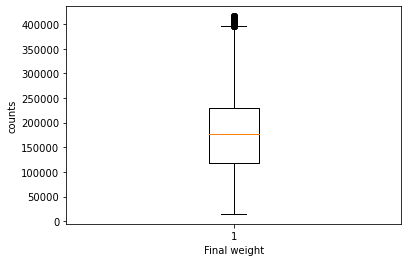

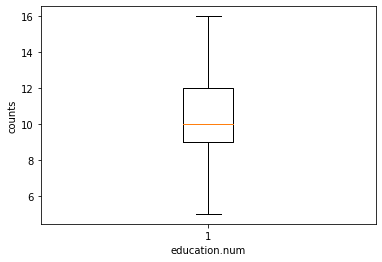

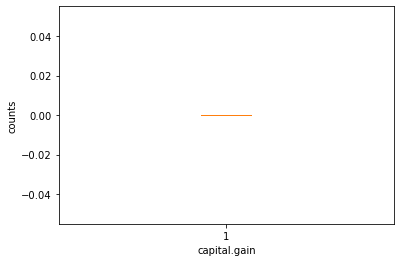

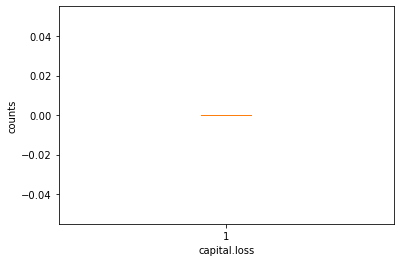

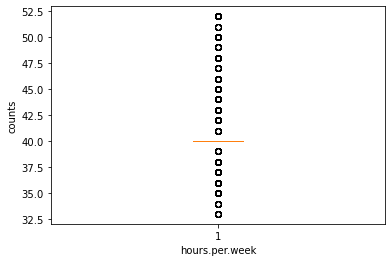

In [18]:
for i in col_list:
    if df[i].dtype==object:
        pass
    else:
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('counts')
        plt.show()

In [19]:
labelencoder=LabelEncoder()

In [20]:
for i in col_list:
    df[i]=labelencoder.fit_transform(df[i])

C:\Users\PRAKASH\AppData\Local\Temp/ipykernel_1932/112004906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=labelencoder.fit_transform(df[i])


In [21]:
df

,age,workclass,Final weight,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,annual.income
2,21,3,9527,8,4,0,5,1,4,1,0,0,7,37,0
3,36,3,10398,1,2,2,5,0,2,1,0,0,7,37,0
4,11,3,13019,6,8,2,9,5,2,0,0,0,7,4,0
5,20,3,11927,9,9,2,3,5,4,0,0,0,7,37,0
7,35,5,9208,8,4,2,3,0,4,1,0,0,12,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,36,3,12724,9,9,2,3,0,4,1,0,0,7,37,1
32555,5,3,12491,11,5,4,10,1,4,1,0,0,7,37,0
32556,10,3,11176,4,7,2,12,5,4,0,0,0,5,37,0
32557,23,3,5335,8,4,2,6,0,4,1,0,0,7,37,1


In [22]:
col_list=[]
for i in df.columns:
    if((df[i].dtypes!='object')&(i!='annual.income')):
        col_list.append(i)

x=df[col_list]
vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_df)

C:\Users\PRAKASH\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


           feature        VIF
0              age   4.232284
1        workclass   5.981212
2     Final weight   3.845999
3        education   8.222038
4    education.num   7.175084
5   marital.status   3.942588
6       occupation   3.210978
7     relationship   2.626492
8             race  16.935816
9              sex   4.363957
10    capital.gain        NaN
11    capital.loss        NaN
12  hours.per.week   5.826110
13  native.country  25.927344


In [23]:
df=df.drop('native.country', axis=1)

In [24]:
col_list=[]
for i in df.columns:
    if((df[i].dtypes!='object')&(i!='annual.income')):
        col_list.append(i)

x=df[col_list]
vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_df)

           feature        VIF
0              age   4.013206
1        workclass   5.870685
2     Final weight   3.799392
3        education   7.781931
4    education.num   7.046813
5   marital.status   3.797174
6       occupation   3.200725
7     relationship   2.467270
8             race  13.487672
9              sex   4.209548
10    capital.gain        NaN
11    capital.loss        NaN
12  hours.per.week   5.718623


C:\Users\PRAKASH\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [25]:
df=df.drop(['capital.gain','capital.loss'], axis=1)

In [26]:
col_list=[]
for i in df.columns:
    if((df[i].dtypes!='object')&(i!='annual.income')):
        col_list.append(i)

x=df[col_list]
vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_df)

           feature        VIF
0              age   4.013206
1        workclass   5.870685
2     Final weight   3.799392
3        education   7.781931
4    education.num   7.046813
5   marital.status   3.797174
6       occupation   3.200725
7     relationship   2.467270
8             race  13.487672
9              sex   4.209548
10  hours.per.week   5.718623


In [27]:
df=df.drop('race', axis=1)

In [28]:
col_list=[]
for i in df.columns:
    if((df[i].dtypes!='object')&(i!='annual.income')):
        col_list.append(i)

x=df[col_list]
vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_df)

          feature       VIF
0             age  3.798441
1       workclass  5.652077
2    Final weight  3.691881
3       education  7.383565
4   education.num  6.818238
5  marital.status  3.720378
6      occupation  3.197648
7    relationship  2.391100
8             sex  3.963990
9  hours.per.week  5.448950


In [29]:
df=df.drop('education', axis=1)

In [30]:
col_list=[]
for i in df.columns:
    if((df[i].dtypes!='object')&(i!='annual.income')):
        col_list.append(i)

x=df[col_list]
vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_df)

          feature       VIF
0             age  3.696812
1       workclass  5.533021
2    Final weight  3.636145
3   education.num  6.037327
4  marital.status  3.663134
5      occupation  3.194668
6    relationship  2.297221
7             sex  3.875350
8  hours.per.week  5.364389


In [31]:
df

,age,workclass,Final weight,education.num,marital.status,occupation,relationship,sex,hours.per.week,annual.income
2,21,3,9527,4,0,5,1,1,7,0
3,36,3,10398,2,2,5,0,1,7,0
4,11,3,13019,8,2,9,5,0,7,0
5,20,3,11927,9,2,3,5,0,7,0
7,35,5,9208,4,2,3,0,1,12,1
...,...,...,...,...,...,...,...,...,...,...
32554,36,3,12724,9,2,3,0,1,7,1
32555,5,3,12491,5,4,10,1,1,7,0
32556,10,3,11176,7,2,12,5,0,5,0
32557,23,3,5335,4,2,6,0,1,7,1


In [32]:
# ii) Build a logistic regression model where the dependent variable is 
# “X”(yearly income) and the independent variable is “occupation”.

x=pd.DataFrame(df.iloc[:,5])
x

,occupation
2,5
3,5
4,9
5,3
7,3
...,...
32554,3
32555,10
32556,12
32557,6


In [33]:
y=df.iloc[:,-1]
y

2        0
3        0
4        0
5        0
7        1
        ..
32554    1
32555    0
32556    0
32557    1
32558    0
Name: annual.income, Length: 18997, dtype: int32

In [34]:
# i) Divide the dataset into training and test sets in 70:30 ratio.

x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.70, random_state=0)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(13297, 1)
(13297,)
(5700, 1)
(5700,)


In [36]:
simple_model=LogisticRegression()

In [37]:
simple_model.fit(x_train,y_train)

LogisticRegression()

In [38]:
# iii) Predict the values on the test set

predictions1 = simple_model.predict(x_test)

In [39]:
predictions1

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
# iv) Build a confusion matrix and find the accuracy.
print('Accuracy of Simple Logistic Regression Model: ')
print(accuracy_score(y_test, predictions1))

Accuracy of Simple Logistic Regression Model: 
0.7821052631578947


In [41]:
print('Confusion Matrix of Simple Logistic Regression Model: ')
print(confusion_matrix(y_test, predictions1))

Confusion Matrix of Simple Logistic Regression Model: 
[[4458    0]
 [1242    0]]


# b) Build a Multiple Logistic Regression model

In [42]:
# ii)  Build a logistic regression model where the dependent variable is 
# “X”(yearly income) and independent variables are “age”, “workclass”, and “education”

x2=pd.DataFrame(df.iloc[:,[0,1,3]])
x2

,age,workclass,education.num
2,21,3,4
3,36,3,2
4,11,3,8
5,20,3,9
7,35,5,4
...,...,...,...
32554,36,3,9
32555,5,3,5
32556,10,3,7
32557,23,3,4


In [43]:
y2=df.iloc[:,-1]
y2

2        0
3        0
4        0
5        0
7        1
        ..
32554    1
32555    0
32556    0
32557    1
32558    0
Name: annual.income, Length: 18997, dtype: int32

In [44]:
# i) Divide the dataset into training and test sets in 80:30 ratio.

x_train, x_test, y_train, y_test=train_test_split(x2,y2, train_size=0.80, random_state=0)

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15197, 3)
(15197,)
(3800, 3)
(3800,)


In [46]:
multiple_model=LogisticRegression()

In [47]:
multiple_model.fit(x_train,y_train)

LogisticRegression()

In [48]:
predictions2 = multiple_model.predict(x_test)

In [49]:
predictions2

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
# iv) Build a confusion matrix and find the accuracy.
print('Accuracy of Multiple Logistic Regression Model: ')
print(accuracy_score(y_test, predictions2))

Accuracy of Multiple Logistic Regression Model: 
0.7894736842105263


In [51]:
print('Confusion Matrix of Multiple Logistic Regression Model: ')
print(confusion_matrix(y_test, predictions2))

Confusion Matrix of Multiple Logistic Regression Model: 
[[2844  125]
 [ 675  156]]


# 5. Decision Tree:

In [52]:
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [53]:
x3=(df.iloc[:,:-1])
x3

,age,workclass,Final weight,education.num,marital.status,occupation,relationship,sex,hours.per.week
2,21,3,9527,4,0,5,1,1,7
3,36,3,10398,2,2,5,0,1,7
4,11,3,13019,8,2,9,5,0,7
5,20,3,11927,9,2,3,5,0,7
7,35,5,9208,4,2,3,0,1,12
...,...,...,...,...,...,...,...,...,...
32554,36,3,12724,9,2,3,0,1,7
32555,5,3,12491,5,4,10,1,1,7
32556,10,3,11176,7,2,12,5,0,5
32557,23,3,5335,4,2,6,0,1,7


In [54]:
y3=df.iloc[:,-1]
y3

2        0
3        0
4        0
5        0
7        1
        ..
32554    1
32555    0
32556    0
32557    1
32558    0
Name: annual.income, Length: 18997, dtype: int32

In [55]:
# i) Divide the dataset into training and test sets in 70:30 ratio.
x_train, x_test, y_train, y_test=train_test_split(x3,y3, train_size=0.70, random_state=0)

In [56]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(13297, 9)
(13297,)
(5700, 9)
(5700,)


In [57]:
# ii) Build a decision tree model where the dependent variable is “X”(Yearly Income) 
# and the rest of the variables as independent variables.

clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [58]:
# iii) Predict the values on the test set.

y_train_pred

array([0, 0, 0, ..., 1, 0, 0])

In [59]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} ConfusionMatrix')
    cf = confusion_matrix(y_train_pred,y_train) 
    sns.heatmap(cf, annot=True,cmap = 'Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.9999247950665564
Test score 0.7775438596491228
Train ConfusionMatrix


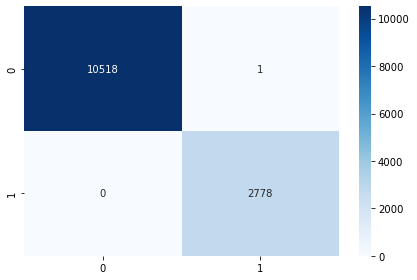

Test ConfusionMatrix


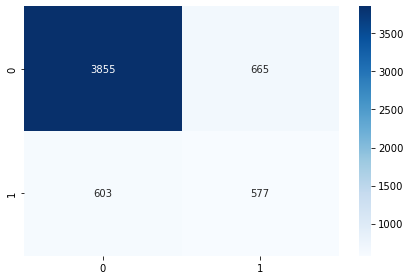

In [60]:
# iv) Build a confusion matrix and calculate the accuracy

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [61]:
params = {'max_depth' : [2,4,6,8,10,12], 
          'min_samples_split' : [2,3,4], 
          'min_samples_leaf': [1,2]} 
clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params) 
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.8363540648266526
Test score 0.8254385964912281
Train ConfusionMatrix


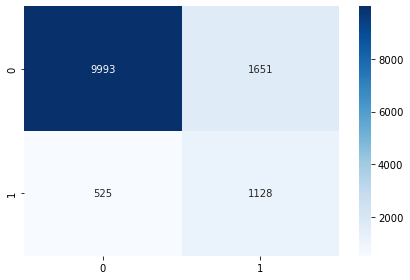

Test ConfusionMatrix


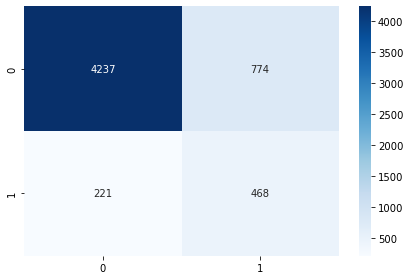

In [62]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [63]:
path = clf.cost_complexity_pruning_path(x_train,y_train)

ccp_alphas,impurities = path.ccp_alphas, path.impurities 
print(ccp_alphas)

[0.00000000e+00 2.25614800e-05 2.99300442e-05 3.00186429e-05
 3.00425991e-05 3.63058299e-05 3.66624051e-05 3.67668564e-05
 3.68929862e-05 3.71846615e-05 3.72510418e-05 3.74020576e-05
 3.75789063e-05 4.01092978e-05 4.01092978e-05 4.01092978e-05
 4.29742477e-05 4.38695445e-05 4.51229601e-05 4.51229601e-05
 4.55787475e-05 4.59585704e-05 4.65554350e-05 4.65554350e-05
 4.71874092e-05 4.76297912e-05 4.77491641e-05 4.78576849e-05
 4.79567692e-05 4.80475964e-05 4.82082907e-05 4.82573500e-05
 4.82797104e-05 4.83460286e-05 4.87815784e-05 4.88172375e-05
 4.90224751e-05 4.90698857e-05 4.90698857e-05 4.91134259e-05
 4.91338898e-05 4.96889739e-05 5.01366223e-05 5.01366223e-05
 5.01366223e-05 5.01366223e-05 5.01366223e-05 5.01366223e-05
 5.01366223e-05 5.01366223e-05 5.01366223e-05 5.01366223e-05
 5.01366223e-05 5.01366223e-05 5.01366223e-05 5.01366223e-05
 5.01366223e-05 5.01366223e-05 5.01366223e-05 5.01366223e-05
 5.01366223e-05 5.01366223e-05 5.01366223e-05 5.01366223e-05
 5.01366223e-05 5.013662

In [64]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)

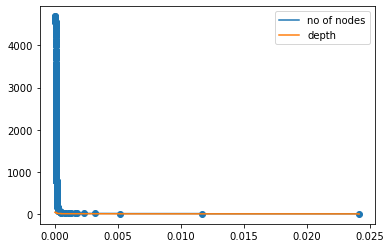

In [65]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts =[clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle='steps-post')
plt.plot(ccp_alphas,depth,label='depth',drawstyle='steps-post')
plt.legend()

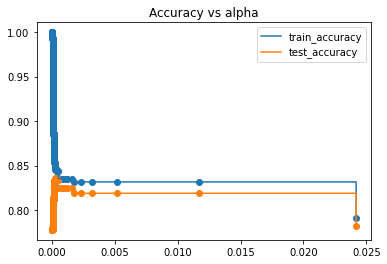

In [66]:
train_acc = []
test_acc = []
for c in clfs:
  y_train_pred = c.predict(x_train)
  y_test_pred = c.predict(x_test)
  train_acc.append(accuracy_score(y_train_pred, y_train))
  test_acc.append(accuracy_score(y_test_pred, y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas, train_acc,label="train_accuracy",drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label="test_accuracy",drawstyle="steps-post")
plt.legend()
plt.title("Accuracy vs alpha")
plt.show()

Train score 0.8315409490862601
Test score 0.8187719298245614
Train ConfusionMatrix


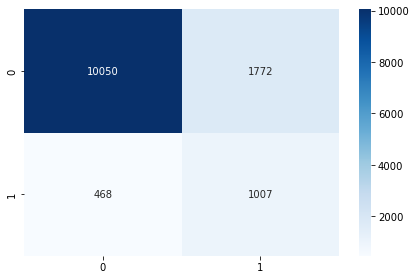

Test ConfusionMatrix


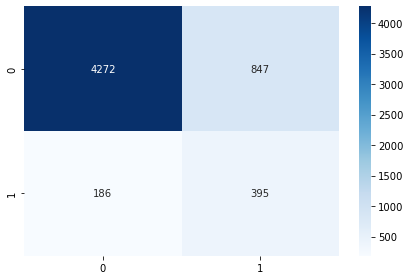

In [67]:
clf_ = tree.DecisionTreeClassifier(random_state=42,ccp_alpha=0.020)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

# 6. Random Forest:

In [68]:
# i) Divide the dataset into training and test sets in 80:20 ratio.

x_train,x_test,y_train,y_test = train_test_split(x3,y3,train_size=0.80,random_state=0)
print(x_train.shape,x_test.shape)

(15197, 9) (3800, 9)


In [69]:
clfy = RandomForestClassifier(n_estimators = 300)

In [70]:
clfy.fit(x_train,y_train)
y_train_pred = clfy.predict(x_train)
y_test_pred = clfy.predict(x_test)

In [71]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [72]:
#iii. Build the confusion matrix and calculate the accuracy 

def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} ConfusionMatrix')
    cf = confusion_matrix(y_train_pred,y_train) 
    sns.heatmap(cf, annot=True,cmap = 'Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.9999341975389879
Test score 0.8234210526315789
Train ConfusionMatrix


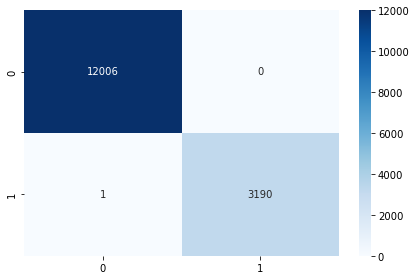

Test ConfusionMatrix


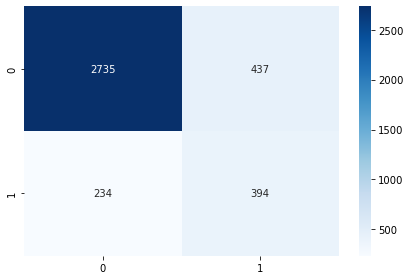

In [73]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [75]:
params = {'max_depth' : [2,4,6,8,10,12], 
          'min_samples_split' : [2,3,4], 
          'min_samples_leaf': [1,2]} 
clfy = RandomForestClassifier(n_estimators = 300)
gcv = GridSearchCV(estimator=clfy,param_grid=params) 
gcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=300),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.8689873001250247
Test score 0.8321052631578948
Train ConfusionMatrix


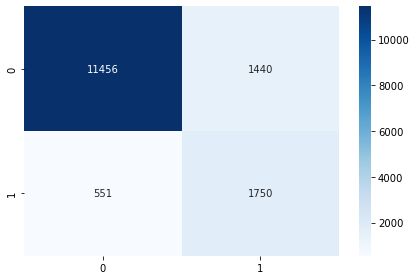

Test ConfusionMatrix


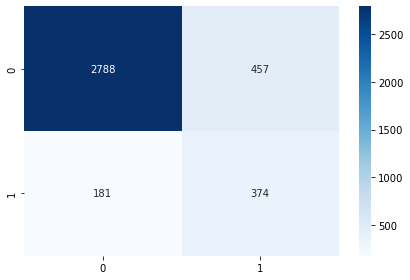

In [76]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')